<a href="https://colab.research.google.com/github/dev6589/HR-Analytics/blob/main/MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
import matplotlib.pyplot as plt


In [5]:
X_train_full[0].shape

(28, 28)

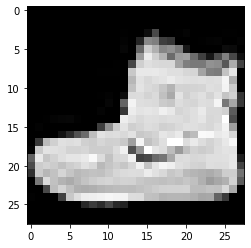

In [6]:
plt.imshow(X_train_full[0], cmap='gray')
plt.show()

In [7]:
y_train_full[0]

9

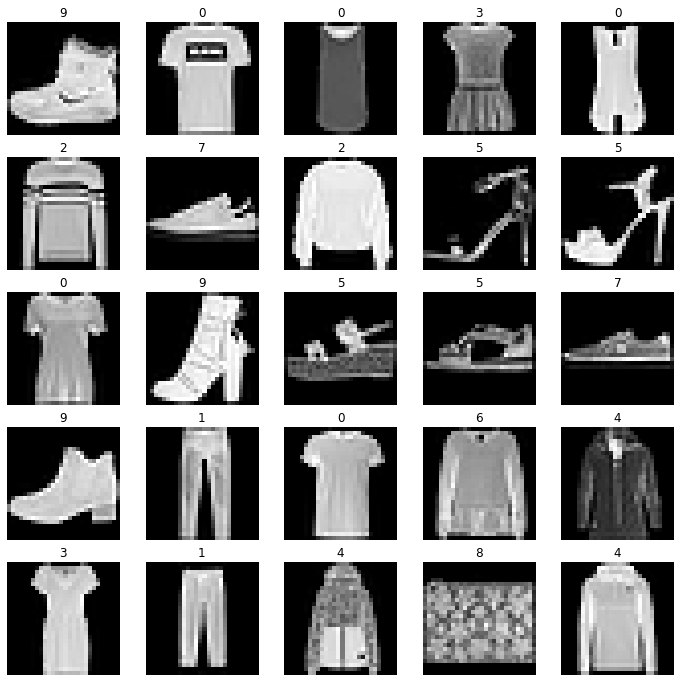

In [8]:
# first 25 images

plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train_full[i], cmap='gray')
  plt.title(y_train_full[i])
  plt.axis('off')

In [9]:

class_names = ["Top","Trouser","Pullover","Dress", "Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]


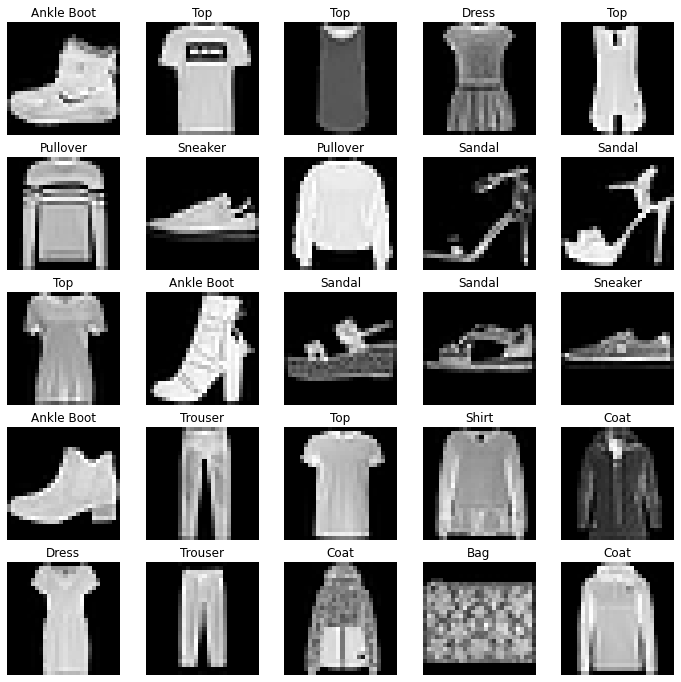

In [10]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train_full[i], cmap='gray')
  plt.title(class_names[y_train_full[i]])
  plt.axis('off')

In [11]:
X_train_full_updated = X_train_full/255.0

In [12]:
y_train_full_updated=keras.utils.to_categorical(y_train_full)
y_test_updated=keras.utils.to_categorical(y_test)

In [13]:
# Import the required layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

# Model object
model = Sequential()

# add layers
model.add(Flatten(input_shape = [28, 28])) #---> Input layer
model.add(Dense(300, activation='relu')) #--> Hidden Layer 1
model.add(Dense(100, activation='relu')) #--> Hidden Layer 2

#--> Add your own layer
model.add(Dense(10, activation='softmax')) #---> Output layer
model.summary()

# Callback
cb = EarlyStopping(patience=10)


# Compile the model #--> SGD, Adam, RMSPROP, ..... # error function
model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(X_train_full_updated, y_train_full_updated, epochs=1000, validation_split=0.2, callbacks=cb) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1500/1500 [==============================] - 19s 4ms/step - loss: 1.0168 - accuracy: 0.6899 - val_loss: 0.5470 - val_accuracy: 0.8098
Epoch 2/1000
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5145 - accuracy: 0.

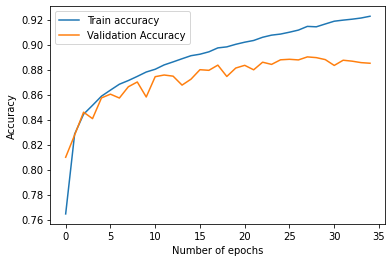

In [14]:
h = hist.history
plt.plot(h['accuracy'],label = 'Train accuracy')
plt.plot(h['val_accuracy'],label = 'Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

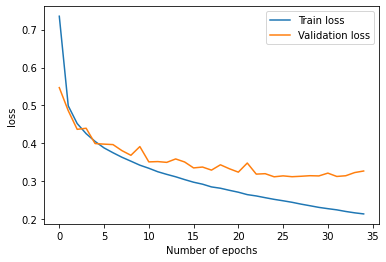

In [15]:
plt.plot(h['loss'],label = 'Train loss')
plt.plot(h['val_loss'],label = 'Validation loss')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.show()

In [16]:
model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1, ..., 8, 1, 5])